# **Set Operations on Datasets**

In any data analysis process, most likely, we will be working with more than one dataset.

It is handy to combine those datasets in different ways.

Using Python, we can perform different types of combinations to gain more insights into the resulting dataset. 

An important subset of those combinations is `Set operations`.

## **Set Operations**

Set operations are the mathematical operations that are used for comparison purposes.

Let's use the image below to understand some of those operations 

![title](../img/set-operations.png)


## **Let's play around with set operations and different datasets**

### **Prepare datasets**

In [2]:
import locussdk as locus
import pandas as pd 
import numpy as np 
import plotly.express as px 
from datetime import datetime, timedelta
import seaborn as sns 
import matplotlib.pyplot as plt 

We will be using Popular Times V2 to create different audiences and compare them to each other.

An **audience** is a list of device IDs with other attributes about them. 

We build an audience around Points of Interest (POI) for a business.

#### Get POIs

First, we need to define the POI lists we will be comparing. 

Let's check the available global POI lists.

In [3]:
avail_pois = locus.get_avail_poi_lists('global')

In [4]:
avail_pois.head()

name  poi_list_id whitelabelid customerid
0  Second Cup Canada            2         None       None
1          McDonalds            3         None       None
2        Tim Hortons            4         None       None
3           Xtracash            7         None       None
4    Overwaiteafoods            8         None       None

In [5]:
avail_pois[avail_pois['name'].isin(['Longos', 'Sobeys', 'Loblaws'])]

name  poi_list_id whitelabelid customerid
199   Longos          204         None       None
225  Loblaws          230         None       None
488   Sobeys          493         None       None

Let's get the POIs for each POI list and get only the POIs located in Ontario.

In [6]:
loblaws_pois = locus.get_pois(230)

In [7]:
loblaws_pois = loblaws_pois[loblaws_pois['region'] == 'ON']

In [8]:
longos_pois = locus.get_pois(204)

In [9]:
longos_pois = longos_pois[longos_pois['region'] == 'ON']

In [10]:
sobeys_pois = locus.get_pois(493)

In [11]:
sobeys_pois = sobeys_pois[sobeys_pois['region'] == 'ON']

#### Generate audiences 

Using the defined POIs, we will get the audiences for Loblaws POIs from March 15th and March 16th with a 100m radius.

In [12]:
loblaws_audience = locus.get_audience(loblaws_pois, '20210315', 100)

You can see that the function `get_audience` can only create an audience one day at a time.

In [13]:
loblaws_audience.head()

total_counts                                          deviceIDs hour  \
0             1  [JKtJ9rtuoZkeav7yZZDG4fDmNCz9eG2tkD6FLiF0K/G81...   06   
1             1  [JKtJ9rtuoZkeav7yZZDG4fDmNCz9eG2tkD6FLiF0K/G81...   07   
2             1  [JKtJ9rtuoZkeav7yZZDG4fDmNCz9eG2tkD6FLiF0K/G81...   07   
3             1  [JKtJ9rtuocN8QHGxhpjwBToFtzXPavlvIXkqzy7Q+nCbH...   08   
4             1  [JKtJ9rtuoZvE9et3YloGccRxggXh7Cayccb5uCPQbaHth...   08   

      day        HoD                   coords      date     id     name  \
0  Monday  06_Monday  43.6615135, -79.5197696  20210315  47652  Loblaws   
1  Monday  07_Monday  43.6615135, -79.5197696  20210315  47652  Loblaws   
2  Monday  07_Monday  43.6615135, -79.5197696  20210315  47652  Loblaws   
3  Monday  08_Monday  43.6615135, -79.5197696  20210315  47652  Loblaws   
4  Monday  08_Monday  43.6615135, -79.5197696  20210315  47652  Loblaws   

        city region postalCode country  \
0  Etobicoke     ON    M9A 3T7      CA   
1  Etobicoke     ON    M9A 3T7      CA   
2  Etobicoke     ON    M9A 3T7      CA   
3  Etobicoke     ON    M9A 3T7      CA   
4  Etobicoke     ON    M9A 3T7      CA   

                                    addressLabel        lat       lon  chainId  
0  270 The Kingsway,Etobicoke,ON,M9A 3T7, Canada  43.661513 -79.51977      229  
1  270 The Kingsway,Etobicoke,ON,M9A 3T7, Canada  43.661513 -79.51977      229  
2  270 The Kingsway,Etobicoke,ON,M9A 3T7, Canada  43.661513 -79.51977      229  
3  270 The Kingsway,Etobicoke,ON,M9A 3T7, Canada  43.661513 -79.51977      229  
4  270 The Kingsway,Etobicoke,ON,M9A 3T7, Canada  43.661513 -79.51977      229

In [14]:
loblaws_audience_2 = locus.get_audience(loblaws_pois, '20210316', 100)

In [15]:
loblaws_audience_2.head()

total_counts                                          deviceIDs hour  \
0             1  [JKtJ9rtuoZkeav7yZZDG4fDmNCz9eG2tkD6FLiF0K/G81...   05   
1             1  [JKtJ9rtuoZkeav7yZZDG4fDmNCz9eG2tkD6FLiF0K/G81...   05   
2             1  [JKtJ9rtuoZkeav7yZZDG4fDmNCz9eG2tkD6FLiF0K/G81...   07   
3             1  [JKtJ9rtuoZvE9et3YloGccRxggXh7Cayccb5uCPQbaHth...   07   
4             1  [JKtJ9rtuoZkeav7yZZDG4fDmNCz9eG2tkD6FLiF0K/G81...   08   

       day         HoD                   coords      date     id     name  \
0  Tuesday  05_Tuesday  43.6615135, -79.5197696  20210316  47652  Loblaws   
1  Tuesday  05_Tuesday  43.6615135, -79.5197696  20210316  47652  Loblaws   
2  Tuesday  07_Tuesday  43.6615135, -79.5197696  20210316  47652  Loblaws   
3  Tuesday  07_Tuesday  43.6615135, -79.5197696  20210316  47652  Loblaws   
4  Tuesday  08_Tuesday  43.6615135, -79.5197696  20210316  47652  Loblaws   

        city region postalCode country  \
0  Etobicoke     ON    M9A 3T7      CA   
1  Etobicoke     ON    M9A 3T7      CA   
2  Etobicoke     ON    M9A 3T7      CA   
3  Etobicoke     ON    M9A 3T7      CA   
4  Etobicoke     ON    M9A 3T7      CA   

                                    addressLabel        lat       lon  chainId  
0  270 The Kingsway,Etobicoke,ON,M9A 3T7, Canada  43.661513 -79.51977      229  
1  270 The Kingsway,Etobicoke,ON,M9A 3T7, Canada  43.661513 -79.51977      229  
2  270 The Kingsway,Etobicoke,ON,M9A 3T7, Canada  43.661513 -79.51977      229  
3  270 The Kingsway,Etobicoke,ON,M9A 3T7, Canada  43.661513 -79.51977      229  
4  270 The Kingsway,Etobicoke,ON,M9A 3T7, Canada  43.661513 -79.51977      229

In [16]:
print('First dataset length: ', len(loblaws_audience))
print('Second dataset length: ', len(loblaws_audience_2))

First dataset length:  6098
Second dataset length:  5984


### **Automate the Union and Date generation**

In [17]:
loblaws_audience_union = pd.concat([loblaws_audience, loblaws_audience_2], ignore_index=True)

In [18]:
print('Union dataset length: ', len(loblaws_audience_union))

Union dataset length:  12082


As the audiences were generated for different days, there is no overlap on the records, and the result will be similar to grabbing the second dataset and placing it below the first one

Manually running one line to get the audience for one date and a second line to combine each audience is tedious, so we will automate this by: 

1. Automatically generating a range of dates we are interested in using a function get_dates 

2. Using these lists of dates, we will get an audience for each date 

3. Combining all of these audiences into one big audience

We will be using the functions `datetime` and `timedelta` to work with dates and create a function to **automate the dates generation**.

In [19]:
date_val = datetime(2020, 12, 25)
date_val

datetime.datetime(2020, 12, 25, 0, 0)

`datetime.strftime` will help us transform a DateTime to a string using the format we are interested in. 

In [20]:
datetime.strftime(date_val, '%Y%m%d')

'20201225'

`datetime.strptime` will help us transform a string to a DateTime object.

In [21]:
date_string = '20201225'

datetime.strptime(date_string, '%Y%m%d')

datetime.datetime(2020, 12, 25, 0, 0)

`timedelta` will help us calculating differences in dates using DateTime object.

In [22]:
datetime(2020, 12, 25) + timedelta(days=1)

datetime.datetime(2020, 12, 26, 0, 0)

In [23]:
## Function to generate dates given and start and end  

def get_dates(start, end):
    
    current = datetime.strptime(start, '%Y%m%d')
    end = datetime.strptime(end, '%Y%m%d')
    dates = []
    while current <= end:
        dates.append(datetime.strftime(current, '%Y%m%d'))
        current = current + timedelta(days=1)
        
    return dates

In [24]:
get_dates('20201225', '20210103')

['20201225',
 '20201226',
 '20201227',
 '20201228',
 '20201229',
 '20201230',
 '20201231',
 '20210101',
 '20210102',
 '20210103']

We will loop over the generated dates and build an audience for each one.

Using concat, we can unify all the device IDs from Loblaws, Sobeys and Longos into one list, emulating a `Union All` operation.

In [25]:
start = '20201225'
end = '20210103'

In [26]:
# Loblaws audience 
loblaws_audience = pd.DataFrame()
for date in get_dates(start, end):
    audience = locus.get_audience(loblaws_pois, date, 100)
    loblaws_audience = pd.concat([loblaws_audience, audience], ignore_index=True)

In [27]:
# Longos audience 
longos_audience = pd.DataFrame()
for date in get_dates(start, end):
    audience = locus.get_audience(longos_pois, date, 100)
    longos_audience = pd.concat([longos_audience, audience], ignore_index=True)

In [28]:
# Sobeys audience 
sobeys_audience = pd.DataFrame()
for date in get_dates(start, end):
    audience = locus.get_audience(sobeys_pois, date, 100)
    sobeys_audience = pd.concat([sobeys_audience, audience], ignore_index=True)

In [29]:
loblaws_audience.head()

total_counts                                          deviceIDs hour  \
0             1  [JKtJ9rtuoZg9BA6BBcEB+oMvv7M7HYvebFJbn81nTKeLx...   22   
1             1  [JKtJ9rtuoZzI2uzV7zEvdsgq41nzJvpe5eqL8vV+zIO6X...   15   
2             1  [JKtJ9rtuoc4Rxyc7fnXjBC09r5g4I09R7MDWhyqhQydrQ...   20   
3             1  [JKtJ9rtuoZyTDei7yLJ+cpw4oacAidpCw7vqQQ4HrNcSR...   21   
4             1  [JKtJ9rtuoZzI1SyH2g4IHiKv1vKfn29u+pLx40zvRqm7n...   05   

      day        HoD                   coords      date     id     name  \
0  Friday  22_Friday  45.4293416, -75.6648604  20201225  47614  Loblaws   
1  Friday  15_Friday  45.4293416, -75.6648604  20201225  47614  Loblaws   
2  Friday  20_Friday  45.4293416, -75.6648604  20201225  47614  Loblaws   
3  Friday  21_Friday  45.4293416, -75.6648604  20201225  47614  Loblaws   
4  Friday  05_Friday  45.4293416, -75.6648604  20201225  47614  Loblaws   

     city region postalCode country  \
0  Ottawa     ON    K1L 6P9      CA   
1  Ottawa     ON    K1L 6P9      CA   
2  Ottawa     ON    K1L 6P9      CA   
3  Ottawa     ON    K1L 6P9      CA   
4  Ottawa     ON    K1L 6P9      CA   

                                  addressLabel        lat       lon  chainId  
0  100 McArthur Road,Ottawa,ON,K1L 6P9, Canada  45.429342 -75.66486      229  
1  100 McArthur Road,Ottawa,ON,K1L 6P9, Canada  45.429342 -75.66486      229  
2  100 McArthur Road,Ottawa,ON,K1L 6P9, Canada  45.429342 -75.66486      229  
3  100 McArthur Road,Ottawa,ON,K1L 6P9, Canada  45.429342 -75.66486      229  
4  100 McArthur Road,Ottawa,ON,K1L 6P9, Canada  45.429342 -75.66486      229

As the deviceIDs are inside a list, we will unpack those deviceIDs, so each one will be one record.

In [30]:
loblaws_audience = loblaws_audience.explode('deviceIDs')
loblaws_audience = loblaws_audience.drop(['total_counts'], axis=1)


In [31]:
loblaws_audience.head()

deviceIDs hour     day        HoD  \
0  JKtJ9rtuoZg9BA6BBcEB+oMvv7M7HYvebFJbn81nTKeLxX...   22  Friday  22_Friday   
1  JKtJ9rtuoZzI2uzV7zEvdsgq41nzJvpe5eqL8vV+zIO6XP...   15  Friday  15_Friday   
2  JKtJ9rtuoc4Rxyc7fnXjBC09r5g4I09R7MDWhyqhQydrQK...   20  Friday  20_Friday   
3  JKtJ9rtuoZyTDei7yLJ+cpw4oacAidpCw7vqQQ4HrNcSRW...   21  Friday  21_Friday   
4  JKtJ9rtuoZzI1SyH2g4IHiKv1vKfn29u+pLx40zvRqm7nZ...   05  Friday  05_Friday   

                    coords      date     id     name    city region  \
0  45.4293416, -75.6648604  20201225  47614  Loblaws  Ottawa     ON   
1  45.4293416, -75.6648604  20201225  47614  Loblaws  Ottawa     ON   
2  45.4293416, -75.6648604  20201225  47614  Loblaws  Ottawa     ON   
3  45.4293416, -75.6648604  20201225  47614  Loblaws  Ottawa     ON   
4  45.4293416, -75.6648604  20201225  47614  Loblaws  Ottawa     ON   

  postalCode country                                 addressLabel        lat  \
0    K1L 6P9      CA  100 McArthur Road,Ottawa,ON,K1L 6P9, Canada  45.429342   
1    K1L 6P9      CA  100 McArthur Road,Ottawa,ON,K1L 6P9, Canada  45.429342   
2    K1L 6P9      CA  100 McArthur Road,Ottawa,ON,K1L 6P9, Canada  45.429342   
3    K1L 6P9      CA  100 McArthur Road,Ottawa,ON,K1L 6P9, Canada  45.429342   
4    K1L 6P9      CA  100 McArthur Road,Ottawa,ON,K1L 6P9, Canada  45.429342   

        lon  chainId  
0 -75.66486      229  
1 -75.66486      229  
2 -75.66486      229  
3 -75.66486      229  
4 -75.66486      229

In [32]:
longos_audience = longos_audience.explode('deviceIDs')
longos_audience = longos_audience.drop(['total_counts'], axis=1)

sobeys_audience = sobeys_audience.explode('deviceIDs')
sobeys_audience = sobeys_audience.drop(['total_counts'], axis=1)

Using `concat` we can Union All the audiences and check some metrics on those.

In [33]:
loblaws_audience['chain_name'] = 'loblaws'
longos_audience['chain_name'] = 'longos'
sobeys_audience['chain_name'] = 'sobeys'


union_audience = pd.concat([loblaws_audience, longos_audience, sobeys_audience], ignore_index=True)

In [34]:
print('The length of the entire audience is: ', len(union_audience))

The length of the entire audience is:  143469


In [35]:
print('The length of unique device IDs in the audience is: ', len(union_audience['deviceIDs'].unique())

20266

We can check how many devices have been to the different chains using `count` and how many of those are unique using the function `nunique`

In [36]:
union_audience.groupby('chain_name').agg({'deviceIDs':['count', 'nunique']})

deviceIDs        
               count nunique
chain_name                  
loblaws        47325    8125
longos         33642    6950
sobeys         62502    9240

In [37]:
union_audience[union_audience['day'] == 'Friday'].groupby('chain_name').agg({'deviceIDs':['count', 'nunique']})

deviceIDs        
               count nunique
chain_name                  
loblaws         5214    1334
longos          3590    1112
sobeys          7441    1506

Thanks to Union All, we are able to make comparisons between datasets.

Or create great visualizations, showing the daily activity in the different chains.

In [38]:
df_heatmap = union_audience.groupby(['chain_name', 'day', 'hour'], as_index=False).agg({'deviceIDs':'count'})

In [39]:
df_heatmap.head()

chain_name     day hour  deviceIDs
0    loblaws  Friday   00        215
1    loblaws  Friday   01        291
2    loblaws  Friday   02        192
3    loblaws  Friday   03        172
4    loblaws  Friday   04        149

In [40]:
df_heatmap['hour'] = pd.Categorical(df_heatmap['hour'],
                                     ordered=True,
                                     categories=["{:02d}".format(x) for x in list(range(24))])
df_heatmap['day'] = pd.Categorical(df_heatmap['day'],
                                     ordered=True,
                                     categories=['Monday','Tuesday','Wednesday',
                                                 'Thursday','Friday','Saturday','Sunday'])

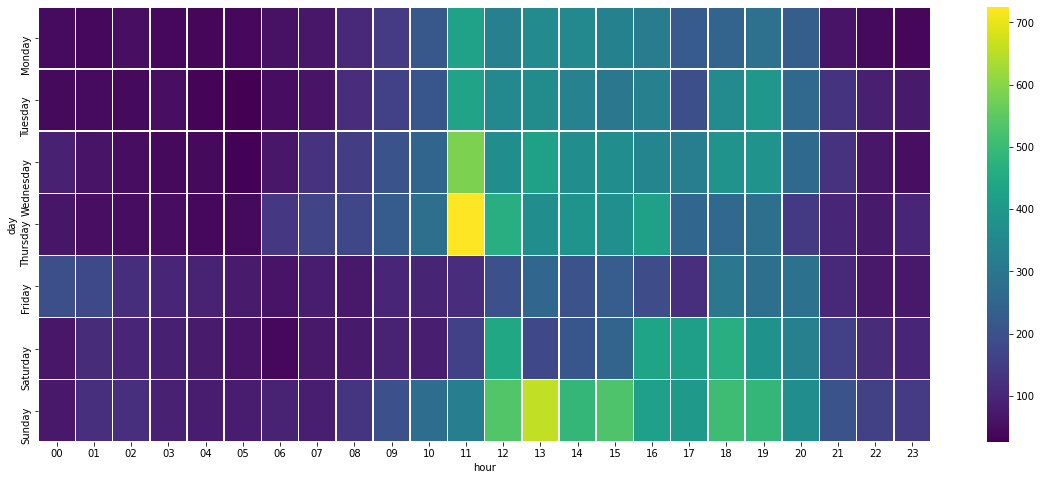

In [41]:
pv = df_heatmap[df_heatmap['chain_name'].isin(['longos'])].pivot_table(index='day',columns='hour',values='deviceIDs')
plt.figure(figsize=(20,8))
sns.heatmap(pv, cmap='viridis', linecolor='white', linewidths='0.5')
plt.show()

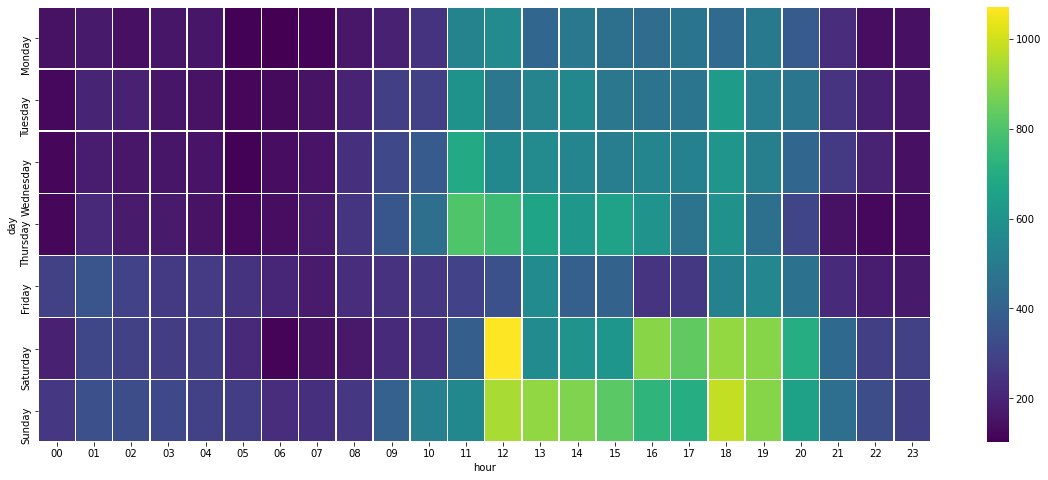

In [42]:
pv = df_heatmap[df_heatmap['chain_name'].isin(['sobeys'])].pivot_table(index='day',columns='hour',values='deviceIDs')
plt.figure(figsize=(20,8))
sns.heatmap(pv, cmap='viridis', linecolor='white', linewidths='0.5')
plt.show()

These two heatmaps are showing the traffic activity on Sobeys and Longos. 

The color of the boxes on the heatmap represents how much traffic there was at each HoD (Hour od day) on each DoW (Day of the week).

### **Intersection in datasets**

Get devices that have been in Longos and also in Sobeys.

In [43]:
device_intersection = (np.intersect1d(longos_audience['deviceIDs'], sobeys_audience['deviceIDs']))


In [44]:
xwi_aud = longos_audience[longos_audience['deviceIDs'].isin(device_intersection)]

In [45]:
xwi_aud

deviceIDs hour     day  \
0      JKtJ9rtuocy7DSFyXUNgrc6eCW3q+7uJ6kw6yOHMKvzYvx...   11  Friday   
1      JKtJ9rtuocy7DSFyXUNgrc6eCW3q+7uJ6kw6yOHMKvzYvx...   11  Friday   
2      JKtJ9rtuocy7DSFyXUNgrc6eCW3q+7uJ6kw6yOHMKvzYvx...   11  Friday   
3      JKtJ9rtuocy7DSFyXUNgrc6eCW3q+7uJ6kw6yOHMKvzYvx...   11  Friday   
4      JKtJ9rtuocy7DSFyXUNgrc6eCW3q+7uJ6kw6yOHMKvzYvx...   11  Friday   
...                                                  ...  ...     ...   
31445  JKtJ9rtuoZvF9y0nHOWHIocYBIdcLp1cZ4IEl/VtwA+sPB...   13  Sunday   
31448  JKtJ9rtuockNipZ82vjlL3Jgr6OGc+BnBlLTCZ54IpGZNM...   15  Sunday   
31449  JKtJ9rtuoZg33zKbQef6EVc+i8/vyNjp2eUFLX3QLfsYhx...   15  Sunday   
31451  JKtJ9rtuoZuT/yIyAoCi9lD1RYpXuf6mzZnRyeLJUWnFOz...   15  Sunday   
31452  JKtJ9rtuochevNy0xmz19/AcgzfLhMZjT/3RaAsYrubHGs...   16  Sunday   

             HoD                   coords      date     id    name     city  \
0      11_Friday     43.849519, -79.35494  20201225  45893  Longos  Markham   
1      11_Friday     43.849519, -79.35494  20201225  45893  Longos  Markham   
2      11_Friday     43.849519, -79.35494  20201225  45893  Longos  Markham   
3      11_Friday     43.849519, -79.35494  20201225  45893  Longos  Markham   
4      11_Friday     43.849519, -79.35494  20201225  45893  Longos  Markham   
...          ...                      ...       ...    ...     ...      ...   
31445  13_Sunday  43.6424523, -79.3809167  20210103  45915  Longos  Toronto   
31448  15_Sunday  43.6424523, -79.3809167  20210103  45915  Longos  Toronto   
31449  15_Sunday  43.6424523, -79.3809167  20210103  45915  Longos  Toronto   
31451  15_Sunday  43.6424523, -79.3809167  20210103  45915  Longos  Toronto   
31452  16_Sunday  43.6424523, -79.3809167  20210103  45915  Longos  Toronto   

      region postalCode country  \
0         ON    L3R 0J5      CA   
1         ON    L3R 0J5      CA   
2         ON    L3R 0J5      CA   
3         ON    L3R 0J5      CA   
4         ON    L3R 0J5      CA   
...      ...        ...     ...   
31445     ON    M5J 0A3      CA   
31448     ON    M5J 0A3      CA   
31449     ON    M5J 0A3      CA   
31451     ON    M5J 0A3      CA   
31452     ON    M5J 0A3      CA   

                                        addressLabel        lat        lon  \
0      3085 Highway No. 7,Markham,ON,L3R 0J5, Canada  43.849519 -79.354940   
1      3085 Highway No. 7,Markham,ON,L3R 0J5, Canada  43.849519 -79.354940   
2      3085 Highway No. 7,Markham,ON,L3R 0J5, Canada  43.849519 -79.354940   
3      3085 Highway No. 7,Markham,ON,L3R 0J5, Canada  43.849519 -79.354940   
4      3085 Highway No. 7,Markham,ON,L3R 0J5, Canada  43.849519 -79.354940   
...                                              ...        ...        ...   
31445      15 York Street,Toronto,ON,M5J 0A3, Canada  43.642452 -79.380917   
31448      15 York Street,Toronto,ON,M5J 0A3, Canada  43.642452 -79.380917   
31449      15 York Street,Toronto,ON,M5J 0A3, Canada  43.642452 -79.380917   
31451      15 York Street,Toronto,ON,M5J 0A3, Canada  43.642452 -79.380917   
31452      15 York Street,Toronto,ON,M5J 0A3, Canada  43.642452 -79.380917   

       chainId chain_name  
0          203     longos  
1          203     longos  
2          203     longos  
3          203     longos  
4          203     longos  
...        ...        ...  
31445      203     longos  
31448      203     longos  
31449      203     longos  
31451      203     longos  
31452      203     longos  

[8385 rows x 17 columns]

We could also get all the different combinations of XWI, this means that we will know all the visits combinations between Longos and Sobeys.

In other words, if the device X has been to two locations of Sobeys and also two locations of Longos, we will register 4 different combinations for the device X.

In [46]:
locus.format_table(columns=True)
xwi_report = pd.merge(longos_audience, sobeys_audience, how='inner', on='deviceIDs', suffixes=['_longos', '_sobeys'])

In [47]:
xwi_report

deviceIDs hour_longos  \
0      JKtJ9rtuocy7DSFyXUNgrc6eCW3q+7uJ6kw6yOHMKvzYvx...          11   
1      JKtJ9rtuocy7DSFyXUNgrc6eCW3q+7uJ6kw6yOHMKvzYvx...          11   
2      JKtJ9rtuocy7DSFyXUNgrc6eCW3q+7uJ6kw6yOHMKvzYvx...          11   
3      JKtJ9rtuocy7DSFyXUNgrc6eCW3q+7uJ6kw6yOHMKvzYvx...          11   
4      JKtJ9rtuocy7DSFyXUNgrc6eCW3q+7uJ6kw6yOHMKvzYvx...          11   
5      JKtJ9rtuocy7DSFyXUNgrc6eCW3q+7uJ6kw6yOHMKvzYvx...          11   
6      JKtJ9rtuocy7DSFyXUNgrc6eCW3q+7uJ6kw6yOHMKvzYvx...          11   
7      JKtJ9rtuocy7DSFyXUNgrc6eCW3q+7uJ6kw6yOHMKvzYvx...          11   
8      JKtJ9rtuocy7DSFyXUNgrc6eCW3q+7uJ6kw6yOHMKvzYvx...          11   
...                                                  ...         ...   
64266  JKtJ9rtuoZuUawpp5mTaHRDbnJJHdd3uJUAjmoMXjKMJeK...          21   
64267  JKtJ9rtuoc5EsdNhPvEQ/Azo6SPuX534pudIbMlmpGSGKk...          12   
64268  JKtJ9rtuoZvF9y0nHOWHIocYBIdcLp1cZ4IEl/VtwA+sPB...          13   
64269  JKtJ9rtuoZvF9y0nHOWHIocYBIdcLp1cZ4IEl/VtwA+sPB...          13   
64270  JKtJ9rtuockNipZ82vjlL3Jgr6OGc+BnBlLTCZ54IpGZNM...          15   
64271  JKtJ9rtuoZuT/yIyAoCi9lD1RYpXuf6mzZnRyeLJUWnFOz...          15   
64272  JKtJ9rtuoZuT/yIyAoCi9lD1RYpXuf6mzZnRyeLJUWnFOz...          15   
64273  JKtJ9rtuochevNy0xmz19/AcgzfLhMZjT/3RaAsYrubHGs...          16   
64274  JKtJ9rtuochevNy0xmz19/AcgzfLhMZjT/3RaAsYrubHGs...          16   

      day_longos HoD_longos            coords_longos date_longos  id_longos  \
0         Friday  11_Friday     43.849519, -79.35494    20201225      45893   
1         Friday  11_Friday     43.849519, -79.35494    20201225      45893   
2         Friday  11_Friday     43.849519, -79.35494    20201225      45893   
3         Friday  11_Friday     43.849519, -79.35494    20201225      45893   
4         Friday  11_Friday     43.849519, -79.35494    20201225      45893   
5         Friday  11_Friday     43.849519, -79.35494    20201225      45893   
6         Friday  11_Friday     43.849519, -79.35494    20201225      45893   
7         Friday  11_Friday     43.849519, -79.35494    20201225      45893   
8         Friday  11_Friday     43.849519, -79.35494    20201225      45893   
...          ...        ...                      ...         ...        ...   
64266     Sunday  21_Sunday  43.6424523, -79.3809167    20210103      45915   
64267     Sunday  12_Sunday  43.6424523, -79.3809167    20210103      45915   
64268     Sunday  13_Sunday  43.6424523, -79.3809167    20210103      45915   
64269     Sunday  13_Sunday  43.6424523, -79.3809167    20210103      45915   
64270     Sunday  15_Sunday  43.6424523, -79.3809167    20210103      45915   
64271     Sunday  15_Sunday  43.6424523, -79.3809167    20210103      45915   
64272     Sunday  15_Sunday  43.6424523, -79.3809167    20210103      45915   
64273     Sunday  16_Sunday  43.6424523, -79.3809167    20210103      45915   
64274     Sunday  16_Sunday  43.6424523, -79.3809167    20210103      45915   

      name_longos city_longos region_longos postalCode_longos country_longos  \
0          Longos     Markham            ON           L3R 0J5             CA   
1          Longos     Markham            ON           L3R 0J5             CA   
2          Longos     Markham            ON           L3R 0J5             CA   
3          Longos     Markham            ON           L3R 0J5             CA   
4          Longos     Markham            ON           L3R 0J5             CA   
5          Longos     Markham            ON           L3R 0J5             CA   
6          Longos     Markham            ON           L3R 0J5             CA   
7          Longos     Markham            ON           L3R 0J5             CA   
8          Longos     Markham            ON           L3R 0J5             CA   
...           ...         ...           ...               ...            ...   
64266      Longos     Toronto            ON           M5J 0A3             CA   
64267      Longos     Toronto            ON           M5J 0A3    

We can create an audience that have walked to Longos first and after that to Sobeys, if the order is something we are interested in. 

In [48]:
xwi_report[xwi_report['date_longos'] < xwi_report['date_sobeys']].head()

deviceIDs hour_longos day_longos  \
0  JKtJ9rtuocy7DSFyXUNgrc6eCW3q+7uJ6kw6yOHMKvzYvx...          11     Friday   
1  JKtJ9rtuocy7DSFyXUNgrc6eCW3q+7uJ6kw6yOHMKvzYvx...          11     Friday   
2  JKtJ9rtuocy7DSFyXUNgrc6eCW3q+7uJ6kw6yOHMKvzYvx...          11     Friday   
3  JKtJ9rtuocy7DSFyXUNgrc6eCW3q+7uJ6kw6yOHMKvzYvx...          11     Friday   
4  JKtJ9rtuocy7DSFyXUNgrc6eCW3q+7uJ6kw6yOHMKvzYvx...          11     Friday   

  HoD_longos         coords_longos date_longos  id_longos name_longos  \
0  11_Friday  43.849519, -79.35494    20201225      45893      Longos   
1  11_Friday  43.849519, -79.35494    20201225      45893      Longos   
2  11_Friday  43.849519, -79.35494    20201225      45893      Longos   
3  11_Friday  43.849519, -79.35494    20201225      45893      Longos   
4  11_Friday  43.849519, -79.35494    20201225      45893      Longos   

  city_longos region_longos postalCode_longos country_longos  \
0     Markham            ON           L3R 0J5             CA   
1     Markham            ON           L3R 0J5             CA   
2     Markham            ON           L3R 0J5             CA   
3     Markham            ON           L3R 0J5             CA   
4     Markham            ON           L3R 0J5             CA   

                             addressLabel_longos  lat_longos  lon_longos  \
0  3085 Highway No. 7,Markham,ON,L3R 0J5, Canada   43.849519   -79.35494   
1  3085 Highway No. 7,Markham,ON,L3R 0J5, Canada   43.849519   -79.35494   
2  3085 Highway No. 7,Markham,ON,L3R 0J5, Canada   43.849519   -79.35494   
3  3085 Highway No. 7,Markham,ON,L3R 0J5, Canada   43.849519   -79.35494   
4  3085 Highway No. 7,Markham,ON,L3R 0J5, Canada   43.849519   -79.35494   

   chainId_longos chain_name_longos hour_sobeys day_sobeys HoD_sobeys  \
0             203            longos          12     Sunday  12_Sunday   
1             203            longos          12     Sunday  12_Sunday   
2             203            longos          12     Sunday  12_Sunday   
3             203            longos          12     Sunday  12_Sunday   
4             203            longos          12     Sunday  12_Sunday   

             coords_sobeys date_sobeys  id_sobeys name_sobeys city_sobeys  \
0  43.6393703, -79.3805364    20210103      77624      Sobeys     Toronto   
1  43.6393703, -79.3805364    20210103      77624      Sobeys     Toronto   
2  43.6393703, -79.3805364    20210103      77624      Sobeys     Toronto   
3  43.6393703, -79.3805364    20210103      77624      Sobeys     Toronto   
4  43.6393703, -79.3805364    20210103      77624      Sobeys     Toronto   

  region_sobeys postalCode_sobeys country_sobeys  \
0            ON           M5J 1A7             CA   
1            ON           M5J 1A7             CA   
2            ON           M5J 1A7             CA   
3            ON           M5J 1A7             CA   
4            ON           M5J 1A7             CA   

                               addressLabel_sobeys  lat_sobeys  lon_sobeys  \
0  207 Queens Quay,Toronto,ONTARIO,M5J 1A7, Canada    43.63937  -79.380536   
1  207 Queens Quay,Toronto,ONTARIO,M5J 1A7, Canada    43.63937  -79.380536   
2  207 Queens Quay,Toronto,ONTARIO,M5J 1A7, Canada    43.63937  -79.380536   
3  207 Queens Quay,Toronto,ONTARIO,M5J 1A7, Canada    43.63937  -79.380536   
4  207 Queens Quay,Toronto,ONTARIO,M5J 1A7, Canada    43.63937  -79.380536   

   chainId_sobeys chain_name_sobeys  
0             492            sobeys  
1             492            sobeys  
2             492            sobeys  
3             492            sobeys  
4             492            sobeys

If the number of visits is important for our analysis we could include a preprocessing step before performing the `Union All`.

First, we will get the counts per device, and rename the column from chainId to visits.

In [49]:
longos_audience_count = longos_audience.groupby(['deviceIDs', 'chain_name'], as_index=False).agg({'chainId':'count'})
longos_audience_count.rename(columns={'chainId': 'visits'}, inplace=True)

In [50]:
sobeys_audience_count = sobeys_audience.groupby(['deviceIDs', 'chain_name'], as_index=False).agg({'chainId':'count'})
sobeys_audience_count.rename(columns={'chainId': 'visits'}, inplace=True)

This time we will make an outer join returning all devices any filling up with null when a device hasn't been to one of either chains.

We will be using suffixes to differentiate the datasets.

In [51]:
xwi_report_count = pd.merge(longos_audience_count, sobeys_audience_count, how='outer', on='deviceIDs', suffixes=['_longos', '_sobeys'])

In [52]:
visited_both_chains = xwi_report_count[~xwi_report_count.isnull().any(axis=1)]

visited_both_chains.head()

deviceIDs chain_name_longos  \
0   JKtJ9rtuoZ4Qk9qkbctSNvg5I7Chs/LAdU5EpJBSWrpQhZ...            longos   
10  JKtJ9rtuoZ4QmRDvqY75ZWM0aV1URClOK0YQhC8Yo7wi85...            longos   
13  JKtJ9rtuoZ4QmuMUn11D/mhyBcHOEmKPTPZoZWGD17YnrV...            longos   
25  JKtJ9rtuoZ4QzbH/Pw16LsVY/2A9MvlwXe5egdboR6/fVb...            longos   
26  JKtJ9rtuoZ4QzeZYqbqv9DMUWfg44nNa5K+SyDjszfHheS...            longos   

    visits_longos chain_name_sobeys  visits_sobeys  
0             8.0            sobeys            3.0  
10            1.0            sobeys           10.0  
13            4.0            sobeys            4.0  
25            4.0            sobeys            7.0  
26            6.0            sobeys            2.0

We might be interested in devices that visited both places at least 2 times in that week.

In [53]:
visited_both_chains[(visited_both_chains['visits_longos'] > 2) & (visited_both_chains['visits_sobeys'] > 2)]

deviceIDs chain_name_longos  \
0     JKtJ9rtuoZ4Qk9qkbctSNvg5I7Chs/LAdU5EpJBSWrpQhZ...            longos   
13    JKtJ9rtuoZ4QmuMUn11D/mhyBcHOEmKPTPZoZWGD17YnrV...            longos   
25    JKtJ9rtuoZ4QzbH/Pw16LsVY/2A9MvlwXe5egdboR6/fVb...            longos   
39    JKtJ9rtuoZ4RFHp1M3iw+UMgDi3pGkachlVLDe7q5UUebS...            longos   
129   JKtJ9rtuoZ4Uw4lpt3J3xbg6VHtCC+MJBZchOXDzcDJTwH...            longos   
142   JKtJ9rtuoZ4V+gPzhKFajIv2k4705Wje767u8FcvMonLhp...            longos   
149   JKtJ9rtuoZ4V/Pf2DMgabo8PBFcOwl5/TmvKwgqv7nBIE2...            longos   
212   JKtJ9rtuoZ4Xnc7IeDgbTgprZhPRHiIDWVcwJtb0OoYnn8...            longos   
228   JKtJ9rtuoZ4e+JvBtmgzpUoQ8nKsYREMhtIBYDg7viqjPT...            longos   
...                                                 ...               ...   
6759  JKtJ9rtuocyzqlAQxeztfKWRJCbRwO2ptY09bukmGbQbHb...            longos   
6783  JKtJ9rtuoczo6P0rLq0SeMnWPtH9qK69cuBsMTSXsWI8po...            longos   
6803  JKtJ9rtuoczovL4y85b1VXMiHvKxs+ZqCCNvSz8FyDZ8V+...            longos   
6807  JKtJ9rtuoczoviLLBJdc9tx6DibWbsNMcs6kUo5DT1wukc...            longos   
6810  JKtJ9rtuoczp2BCM41AbbP1kLpdu6rgqzEdXSQLrTIcOJ9...            longos   
6823  JKtJ9rtuoczpj1AFbZs4GPV7Ylr125X/kj5HI3YhtNxjfM...            longos   
6861  JKtJ9rtuocztItzste5fxoZPVNiC49Vi9Wewx6tT48nyLT...            longos   
6925  JKtJ9rtuoczv7+mKoquaCINddGVQRdQNIp+PsSrbTXdXzL...            longos   
6927  JKtJ9rtuoczv7K45bFD217XNNTbecombLdeQGIx3vz/QHQ...            longos   

      visits_longos chain_name_sobeys  visits_sobeys  
0               8.0            sobeys            3.0  
13              4.0            sobeys            4.0  
25              4.0            sobeys            7.0  
39              8.0            sobeys            4.0  
129             6.0            sobeys           20.0  
142             3.0            sobeys            4.0  
149             7.0            sobeys            4.0  
212             4.0            sobeys            3.0  
228             3.0            sobeys           18.0  
...             ...               ...            ...  
6759           14.0            sobeys            8.0  
6783            5.0            sobeys            5.0  
6803            9.0            sobeys            6.0  
6807            6.0            sobeys           10.0  
6810            5.0            sobeys           10.0  
6823            5.0            sobeys            3.0  
6861            8.0            sobeys            5.0  
6925           13.0            sobeys            7.0  
6927            8.0            sobeys            7.0  

[308 rows x 5 columns]

Or devices that have visited any of those chains at least 10 times in that week.

In [54]:
visited_both_chains[(visited_both_chains['visits_longos'] + visited_both_chains['visits_sobeys'] > 10)]

deviceIDs chain_name_longos  \
0     JKtJ9rtuoZ4Qk9qkbctSNvg5I7Chs/LAdU5EpJBSWrpQhZ...            longos   
10    JKtJ9rtuoZ4QmRDvqY75ZWM0aV1URClOK0YQhC8Yo7wi85...            longos   
25    JKtJ9rtuoZ4QzbH/Pw16LsVY/2A9MvlwXe5egdboR6/fVb...            longos   
35    JKtJ9rtuoZ4REjjJJUFMOgETtSggBoZkXrOks/dXh2pkXv...            longos   
39    JKtJ9rtuoZ4RFHp1M3iw+UMgDi3pGkachlVLDe7q5UUebS...            longos   
90    JKtJ9rtuoZ4T14csdGqiqc5UShGN8pZANLLJpaA1CtxCeM...            longos   
129   JKtJ9rtuoZ4Uw4lpt3J3xbg6VHtCC+MJBZchOXDzcDJTwH...            longos   
132   JKtJ9rtuoZ4Ux6MVWJgw7UeFcPq6maEkBSkGqQnYL2nN7h...            longos   
149   JKtJ9rtuoZ4V/Pf2DMgabo8PBFcOwl5/TmvKwgqv7nBIE2...            longos   
...                                                 ...               ...   
6807  JKtJ9rtuoczoviLLBJdc9tx6DibWbsNMcs6kUo5DT1wukc...            longos   
6810  JKtJ9rtuoczp2BCM41AbbP1kLpdu6rgqzEdXSQLrTIcOJ9...            longos   
6830  JKtJ9rtuoczpjgdkRYc3xN4ANVAv/i1evO+cRNwCo6/t3n...            longos   
6861  JKtJ9rtuocztItzste5fxoZPVNiC49Vi9Wewx6tT48nyLT...            longos   
6870  JKtJ9rtuocztcUakwfh5eqa6qmAX90Dpma+s1hGb34Y3FA...            longos   
6906  JKtJ9rtuoczucnjhnv14dzZlVpnjnMv1yTa+U6AOxN0bui...            longos   
6914  JKtJ9rtuoczudxwIGoP7ZA0oFKJk7HDrROizq9p0ROXgGs...            longos   
6925  JKtJ9rtuoczv7+mKoquaCINddGVQRdQNIp+PsSrbTXdXzL...            longos   
6927  JKtJ9rtuoczv7K45bFD217XNNTbecombLdeQGIx3vz/QHQ...            longos   

      visits_longos chain_name_sobeys  visits_sobeys  
0               8.0            sobeys            3.0  
10              1.0            sobeys           10.0  
25              4.0            sobeys            7.0  
35             15.0            sobeys            1.0  
39              8.0            sobeys            4.0  
90              2.0            sobeys          239.0  
129             6.0            sobeys           20.0  
132             1.0            sobeys           21.0  
149             7.0            sobeys            4.0  
...             ...               ...            ...  
6807            6.0            sobeys           10.0  
6810            5.0            sobeys           10.0  
6830            1.0            sobeys           84.0  
6861            8.0            sobeys            5.0  
6870            2.0            sobeys           15.0  
6906            1.0            sobeys          163.0  
6914            1.0            sobeys           92.0  
6925           13.0            sobeys            7.0  
6927            8.0            sobeys            7.0  

[341 rows x 5 columns]

All this analysis was possible by doing some aggregation of the data and applying set operators.

### **Minus datasets**

If we would like to give our loyal clients a promo, we can apply a minus operation.

We can run a campaign for customers that ONLY shopped at Loblaws in that time range. We will be checking for the devices that haven't been to Longos or Sobeys in that time.

In [55]:
loblaws_audience[(loblaws_audience['deviceIDs'].isin(longos_audience['deviceIDs']) == False) & 
                 (loblaws_audience['deviceIDs'].isin(sobeys_audience['deviceIDs']) == False)]

deviceIDs hour     day  \
1      JKtJ9rtuoZzI2uzV7zEvdsgq41nzJvpe5eqL8vV+zIO6XP...   15  Friday   
2      JKtJ9rtuoc4Rxyc7fnXjBC09r5g4I09R7MDWhyqhQydrQK...   20  Friday   
3      JKtJ9rtuoZyTDei7yLJ+cpw4oacAidpCw7vqQQ4HrNcSRW...   21  Friday   
4      JKtJ9rtuoZzI1SyH2g4IHiKv1vKfn29u+pLx40zvRqm7nZ...   05  Friday   
5      JKtJ9rtuoZzI2uzV7zEvdsgq41nzJvpe5eqL8vV+zIO6XP...   08  Friday   
6      JKtJ9rtuoc2ABpjbkmjZoBrMRVgFBAuE74x1FS4DLJtXHL...   13  Friday   
7      JKtJ9rtuocpp/ecD910sfq6CeYCol+s81pcPa9QXIQ5qcx...   15  Friday   
8      JKtJ9rtuoche7WmP/9+h1+K0GjYr4jLk4nA1hTqGMebJXo...   19  Friday   
9      JKtJ9rtuoZ4TgCQc3uLO0ur2isA4yItvTF5R/nAJByL2DF...   20  Friday   
...                                                  ...  ...     ...   
43404  JKtJ9rtuoZ8LbxKRY15b8zV4WVTtUTr7Q8nxdCpkMHVjVd...   22  Sunday   
43405  JKtJ9rtuoZ8LbxKRY15b8zV4WVTtUTr7Q8nxdCpkMHVjVd...   22  Sunday   
43406  JKtJ9rtuoZ8LbxKRY15b8zV4WVTtUTr7Q8nxdCpkMHVjVd...   23  Sunday   
43407  JKtJ9rtuoZvH2ZZls/OKvndblGYxVtV3WooAq4oaijS3DZ...   13  Sunday   
43408  JKtJ9rtuoZg2D0qOiNxI1IWp7YYGGYZsQKhLqcRgRQmK0L...   09  Sunday   
43409  JKtJ9rtuocN8Qcqt84L/mmkwIVWCniOm2OqZ9jv68Is3HY...   12  Sunday   
43410  JKtJ9rtuoczvuq40GLQ6I+r01hs6/mPDpf5ujyrFtLlou1...   22  Sunday   
43411  JKtJ9rtuoctd2+kYtTY4XQRq46+GluP44qkqQ0P33TjkUN...   10  Sunday   
43412  JKtJ9rtuocN8Qcqt84L/mmkwIVWCniOm2OqZ9jv68Is3HY...   12  Sunday   

             HoD                   coords      date     id     name     city  \
1      15_Friday  45.4293416, -75.6648604  20201225  47614  Loblaws   Ottawa   
2      20_Friday  45.4293416, -75.6648604  20201225  47614  Loblaws   Ottawa   
3      21_Friday  45.4293416, -75.6648604  20201225  47614  Loblaws   Ottawa   
4      05_Friday  45.4293416, -75.6648604  20201225  47614  Loblaws   Ottawa   
5      08_Friday  45.4293416, -75.6648604  20201225  47614  Loblaws   Ottawa   
6      13_Friday  45.4293416, -75.6648604  20201225  47614  Loblaws   Ottawa   
7      15_Friday  45.4293416, -75.6648604  20201225  47614  Loblaws   Ottawa   
8      19_Friday  45.4293416, -75.6648604  20201225  47614  Loblaws   Ottawa   
9      20_Friday  45.4293416, -75.6648604  20201225  47614  Loblaws   Ottawa   
...          ...                      ...       ...    ...      ...      ...   
43404  22_Sunday  43.8742486, -79.2847899  20210103  47629  Loblaws  Markham   
43405  22_Sunday  43.8742486, -79.2847899  20210103  47629  Loblaws  Markham   
43406  23_Sunday  43.8742486, -79.2847899  20210103  47629  Loblaws  Markham   
43407  13_Sunday  43.8742486, -79.2847899  20210103  47629  Loblaws  Markham   
43408  09_Sunday  43.8742486, -79.2847899  20210103  47629  Loblaws  Markham   
43409  12_Sunday  43.8742486, -79.2847899  20210103  47629  Loblaws  Markham   
43410  22_Sunday  43.8742486, -79.2847899  20210103  47629  Loblaws  Markham   
43411  10_Sunday  43.8742486, -79.2847899  20210103  47629  Loblaws  Markham   
43412  12_Sunday  43.8742486, -79.2847899  20210103  47629  Loblaws  Markham   

      region postalCode country                                  addressLabel  \
1         ON    K1L 6P9      CA   100 McArthur Road,Ottawa,ON,K1L 6P9, Canada   
2         ON    K1L 6P9      CA   100 McArthur Road,Ottawa,ON,K1L 6P9, Canada   
3         ON    K1L 6P9      CA   100 McArthur Road,Ottawa,ON,K1L 6P9, Canada   
4         ON    K1L 6P9      CA   100 McArthur Road,Ottawa,ON,K1L 6P9, Canada   
5         ON    K1L 6P9      CA   100 McArthur Road,Ottawa,ON,K1L 6P9, Canada   
6         ON    K1L 6P9      CA   100 McArthur Road,Ottawa,ON,K1L 6P9, Canada   
7         ON    K1L 6P9      CA   100 McArthur Road,Ottawa,ON,K1L 6P9, Canada   
8         ON    K1L 6P9      CA   100 McArthur Road,Ottawa,ON,K1L 6P9, Canada   
9         ON    K1L 6P9      CA   100 McArthur Road,Ottawa,ON,K1L 6P9, Canada   
...      ...        ...     ...                                           ...   
43404     ON    L3P 1W2      CA  200 Bullock Drive,Markham,ON,L3P 1W2, Canada   
43405     ON 